Using TensorFlow backend.


(50000, 28, 28) (50000,)


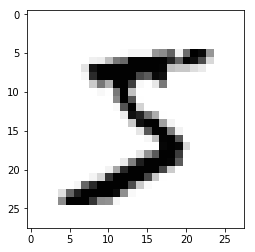

In [1]:
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap="Greys");

In [2]:
import tensorflow as tf

In [3]:

X = tf.placeholder(dtype=tf.float32, shape = (None, 28, 28), name = 'X')
y = tf.placeholder(dtype=tf.int32, shape = (None,), name = 'y' )

W1 = tf.get_variable("W1", [28 * 28, 128], initializer=tf.contrib.layers.xavier_initializer(seed=1))
b1 = tf.get_variable("b1", [128], initializer=tf.zeros_initializer())

#flatten X input to 1D
X1 = tf.contrib.layers.flatten(X)
z1 = tf.matmul(X1, W1) + b1
a1 = tf.nn.relu(z1)

W2 = tf.get_variable("W2", [128, 64], initializer=tf.contrib.layers.xavier_initializer(seed=1))
b2 = tf.get_variable("b2", [64], initializer=tf.zeros_initializer())
z2 = tf.matmul(a1, W2) + b2
a2 = tf.nn.relu(z2)    


W3 = tf.get_variable("W3", [64, 10], initializer=tf.contrib.layers.xavier_initializer(seed=1))
b3 = tf.get_variable("b3", [10], initializer=tf.zeros_initializer())
z3 = tf.matmul(a2, W3) + b3    
predict_y = tf.nn.softmax(z3)

y1 = tf.one_hot(y, depth = 10)    
loss = tf.reduce_mean(tf.reduce_sum(-tf.log(predict_y) * y1)) 
       

In [4]:
# Calculate the correct predictions
correct_prediction = tf.equal(tf.argmax(z3), tf.argmax(y1))

# Calculate accuracy on the test set
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [5]:
optimizer = tf.train.AdamOptimizer().minimize(loss)

In [6]:
from sklearn.metrics import accuracy_score, log_loss
trainLoss = []
testLoss = []
trainLossTf = []
batchNum = 5
batchSize = X_train.shape[0] / batchNum
s = tf.Session()
s.run(tf.global_variables_initializer())
for epoch in range(100):
    avg_cost = 0.
    for batch_i in range(batchNum):
        X_batch, y_batch = X_train[batch_i * batchSize: (batch_i + 1) * batchSize],\
                           y_train[batch_i * batchSize: (batch_i + 1) * batchSize]
        cost, _ = s.run([loss, optimizer], feed_dict = {X: X_batch, y: y_batch})
        avg_cost += cost/batchSize
    trainLossTf.append(avg_cost)        
    trainLoss.append(log_loss(y_train, s.run(predict_y, {X:X_train})))
    testLoss.append(log_loss(y_test, s.run(predict_y, {X:X_test})))
    if epoch % 10 == 0:    
        print("Epoch:", '%d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))
        print ("Train Accuracy:", accuracy_score(y_train, s.run(tf.argmax(s.run(predict_y, {X:X_train}), axis = 1))))
        print ("Test Accuracy:", accuracy_score(y_test, s.run(tf.argmax(s.run(predict_y, {X:X_test}), axis = 1))))

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Epoch: 1 cost= 10.737491992
Train Accuracy: 0.58554
Test Accuracy: 0.5957
Epoch: 11 cost= 1.528155811
Train Accuracy: 0.9157
Test Accuracy: 0.9187
Epoch: 21 cost= 1.020944629
Train Accuracy: 0.94366
Test Accuracy: 0.9431
Epoch: 31 cost= 0.753776074
Train Accuracy: 0.95836
Test Accuracy: 0.9538
Epoch: 41 cost= 0.580569714
Train Accuracy: 0.96784
Test Accuracy: 0.9602
Epoch: 51 cost= 0.457335846
Train Accuracy: 0.97488
Test Accuracy: 0.9653
Epoch: 61 cost= 0.364523248
Train Accuracy: 0.98084
Test Accuracy: 0.9689
Epoch: 71 cost= 0.293268622
Train Accuracy: 0.98512
Test Accuracy: 0.9708
Epoch: 81 cost= 0.237467719
Train Accuracy: 0.98868
Test Accuracy: 0.9719
Epoch: 91 cost= 0.192738831
Train Accuracy: 0.99138
Test Accuracy: 0.9732


In [7]:
print("train auc:", accuracy_score(y_train, s.run(tf.argmax(s.run(predict_y, {X:X_train}), axis = 1))))
print("test auc:", accuracy_score(y_test, s.run(tf.argmax(s.run(predict_y, {X:X_test}), axis = 1))))

train auc: 0.99322
test auc: 0.9734


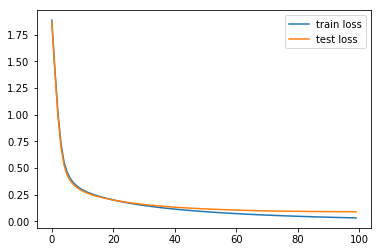

In [8]:
# Plot the train loss and test loss as a function of the training iteration number
from matplotlib import pyplot as plt
plt.plot(trainLoss, label ='train loss')
plt.plot(testLoss, label = 'test loss')
plt.legend(loc = 'best')
plt.show()